In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.608820,0.943958,-1.942662e-07,0.580166,0.850155,-0.054410,0.591801,0.733074,-0.079254,0.663076,...,0.799396,0.754965,-0.083151,0.756195,0.807580,-0.071663,0.720501,0.839983,-0.049987,1
1,0.562147,0.924948,-2.314989e-07,0.520188,0.839646,-0.054607,0.515399,0.713789,-0.083280,0.579713,...,0.726461,0.710782,-0.091622,0.681738,0.772005,-0.079633,0.651463,0.813789,-0.056465,1
2,0.451060,0.910993,-4.435727e-07,0.397980,0.837127,-0.053302,0.376555,0.708346,-0.087556,0.428178,...,0.617058,0.707902,-0.137635,0.568132,0.772843,-0.123611,0.543378,0.809361,-0.099542,1
3,0.472097,0.872478,-8.247624e-08,0.420642,0.809193,-0.068294,0.413737,0.686775,-0.106161,0.473309,...,0.632707,0.668035,-0.129035,0.588527,0.741957,-0.113643,0.560178,0.776889,-0.086864,1
4,0.475717,0.868880,4.805594e-07,0.447443,0.799378,-0.127334,0.454657,0.695616,-0.177054,0.512604,...,0.636052,0.665239,-0.085199,0.599395,0.739741,-0.090761,0.571423,0.766821,-0.073924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.567008,0.782114,-2.033824e-07,0.478988,0.728346,-0.039866,0.410542,0.614556,-0.058475,0.367657,...,0.668364,0.439758,-0.097071,0.679359,0.373369,-0.104717,0.689604,0.304914,-0.100428,iloveu
594,0.558989,0.755671,-4.306764e-07,0.475598,0.703613,-0.015456,0.416471,0.590028,-0.018471,0.386417,...,0.660142,0.407440,-0.070239,0.661092,0.338072,-0.072866,0.663900,0.270675,-0.065704,iloveu
595,0.568157,0.752335,-2.474368e-07,0.482112,0.706588,-0.031499,0.412734,0.594041,-0.046196,0.373611,...,0.662640,0.403667,-0.088709,0.671371,0.335982,-0.093874,0.678098,0.267896,-0.088990,iloveu
596,0.566316,0.728616,-8.678980e-08,0.475327,0.688966,-0.047267,0.400203,0.578595,-0.069667,0.348101,...,0.660341,0.385104,-0.108235,0.674627,0.316030,-0.117675,0.687986,0.244615,-0.113600,iloveu


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.608820,0.943958,-1.942662e-07,0.580166,0.850155,-0.054410,0.591801,0.733074,-0.079254,0.663076,...,0.799396,0.754965,-0.083151,0.756195,0.807580,-0.071663,0.720501,0.839983,-0.049987,1
1,0.562147,0.924948,-2.314989e-07,0.520188,0.839646,-0.054607,0.515399,0.713789,-0.083280,0.579713,...,0.726461,0.710782,-0.091622,0.681738,0.772005,-0.079633,0.651463,0.813789,-0.056465,1
2,0.451060,0.910993,-4.435727e-07,0.397980,0.837127,-0.053302,0.376555,0.708346,-0.087556,0.428178,...,0.617058,0.707902,-0.137635,0.568132,0.772843,-0.123611,0.543378,0.809361,-0.099542,1
3,0.472097,0.872478,-8.247624e-08,0.420642,0.809193,-0.068294,0.413737,0.686775,-0.106161,0.473309,...,0.632707,0.668035,-0.129035,0.588527,0.741957,-0.113643,0.560178,0.776889,-0.086864,1
4,0.475717,0.868880,4.805594e-07,0.447443,0.799378,-0.127334,0.454657,0.695616,-0.177054,0.512604,...,0.636052,0.665239,-0.085199,0.599395,0.739741,-0.090761,0.571423,0.766821,-0.073924,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.567008,0.782114,-2.033824e-07,0.478988,0.728346,-0.039866,0.410542,0.614556,-0.058475,0.367657,...,0.668364,0.439758,-0.097071,0.679359,0.373369,-0.104717,0.689604,0.304914,-0.100428,iloveu
594,0.558989,0.755671,-4.306764e-07,0.475598,0.703613,-0.015456,0.416471,0.590028,-0.018471,0.386417,...,0.660142,0.407440,-0.070239,0.661092,0.338072,-0.072866,0.663900,0.270675,-0.065704,iloveu
595,0.568157,0.752335,-2.474368e-07,0.482112,0.706588,-0.031499,0.412734,0.594041,-0.046196,0.373611,...,0.662640,0.403667,-0.088709,0.671371,0.335982,-0.093874,0.678098,0.267896,-0.088990,iloveu
596,0.566316,0.728616,-8.678980e-08,0.475327,0.688966,-0.047267,0.400203,0.578595,-0.069667,0.348101,...,0.660341,0.385104,-0.108235,0.674627,0.316030,-0.117675,0.687986,0.244615,-0.113600,iloveu


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (598, 63)
Labels shape = (598,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['2', '3', 'iloveu', '1', '2', '3', '1', '5', '1', '5', '1', '2',
       '2', 'iloveu', 'iloveu', '3', '1', '3', '2', '1', '1', '4',
       'iloveu', 'iloveu', '4', '4', '1', '2', 'iloveu', '5', 'iloveu',
       '2', '1', '3', '2', '5', '2', 'iloveu', '5', '3', '4', '1',
       'iloveu', 'iloveu', '1', '2', 'iloveu', '2', '1', 'iloveu', '3',
       '3', '2', 'iloveu', 'iloveu', '4', '3', '2', '2', '2', '1', '2',
       '4', 'iloveu', '5', '1', 'iloveu', '5', '1', 'iloveu', 'iloveu',
       '1', '5', '4', '5', 'iloveu', '4', '3', 'iloveu', '4', '5', '4',
       '5', '4', '1', '1', '2', '3', '4', '3', '3', 'iloveu', '1', '4',
       '3', '3', '3', '1', '4', '1', '1', '3', 'iloveu', '4', '1', '4',
       '2', '3', '3', 'iloveu', '3', '4', '4', '4', '4', '5', '5', '2',
       '5', '5'], dtype=object)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

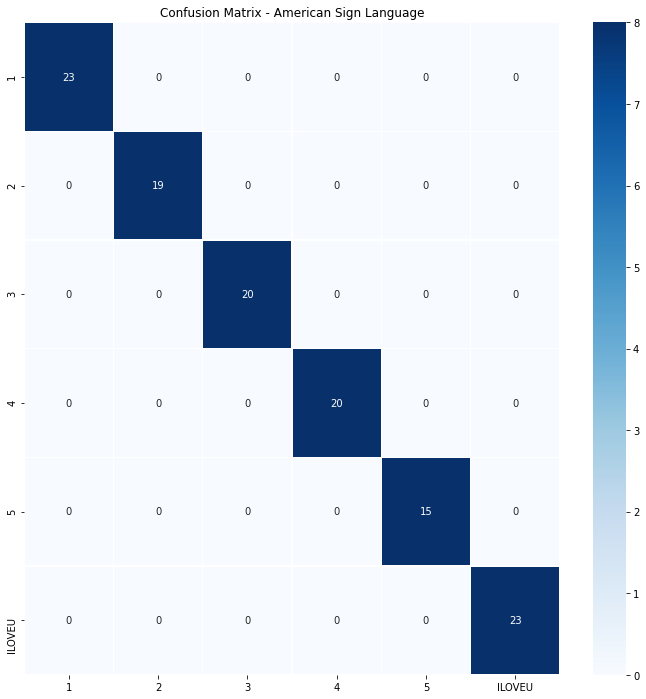

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model_mckiler.pkl','wb') as f:
    pickle.dump(svm,f)